In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Criar um modelo de regressão linear para prever qual será o Investimento inicial necessário de uma franquia a partir da Taxa Anual cobrado pelo franqueador.

In [5]:
dataset = pd.read_csv('slr12.csv', sep=';')
print(dataset.shape)
dataset.head()

(36, 2)


,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [7]:
x = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
x

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850])

In [8]:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [9]:
x = x.reshape(-1, 1) # Com uma coluna a mais
modelo = LinearRegression()
modelo.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
intercp = modelo.intercept_  # Interceptação do eixo Y
print(intercp)
modelo.coef_  # Inclinação da reta de regressão


867.6042222620559


array([0.37315794])

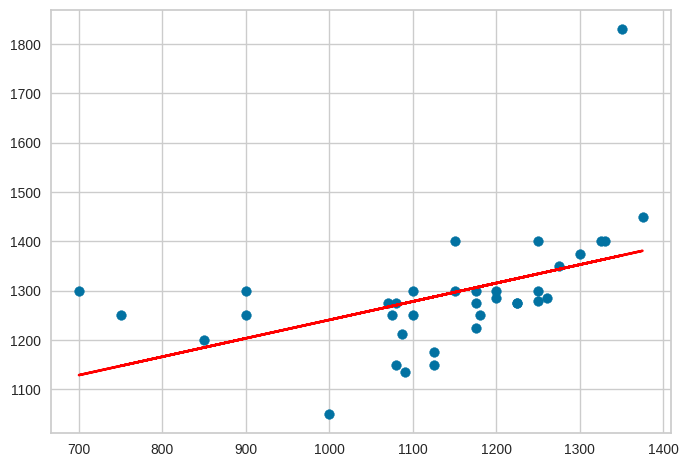

In [13]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [15]:
modelo.predict([[800]])

array([1166.13057101])

In [ ]:
# Uma Taxa de Franquia de 800 dólares prevê um Custo Inicial do empreendimento de 1166 dólares segundo o modelo criado.

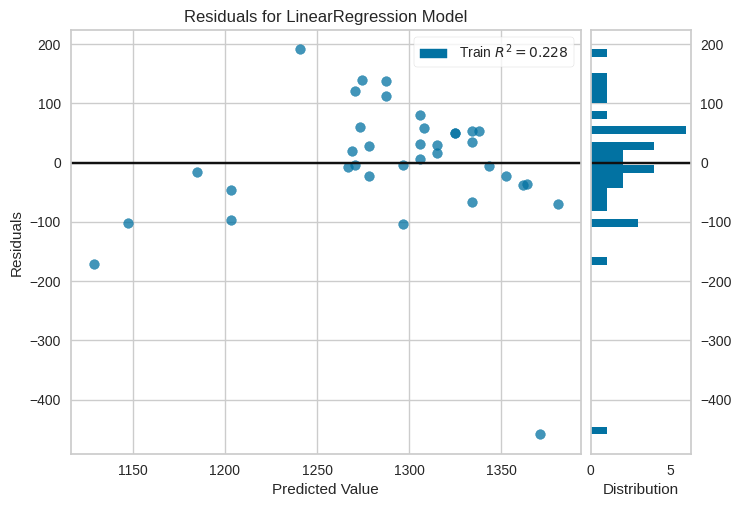

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

In [ ]:
# Conclusão: O Coeficiente de Correlação é de R = 0.4770, o que indica Correlação Mediana, mas o Coeficiente de Determinação é de apenas R² = 0.228, assim, apenas 22,8% da varíavel dependente ou do Custo Inicial de começar um empreendimento são explicados pela variável independente, ou seja, baseado na Taxa de Franquia. O exercício proposto supõem que existe uma baixa relação entre o Custo Inicial de um empreendimento e sua Taxa de Franquia. Visto que a inclinação da Reta de Regressão Linear é positiva, um aumento na Taxa de Franquia produz um aumento aquém do Custo Inicial do empreendimento. Este é um típico modelo precário, de pouca previsibilidade com base nas variáveis tomodas no problema.